In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

 ## Load and Explore the Data


In [2]:
# Load data
data= pd.read_csv('supermarket_sales - Sheet1.csv')
# Display the first five rows of the dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Summary statistics of the dataset
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
# Data structure and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Check for duplicates
data.duplicated().sum()

0

## Date Range and Invoice Analysis
- Identify the date range of the data.
- Count the unique number of days with invoices.


In [6]:
# Date range and unique days
print('Date range from:', data['Date'].min(), 'to', data['Date'].max())
print(f"{data['Date'].nunique()} unique days of invoices.")

Date range from: 1/1/2019 to 3/9/2019
89 unique days of invoices.


## Profit Analysis by Day
- Arrange the days based on total gross income (lowest to highest).


In [7]:
#Arrange the profit by day for all branches from lowest to highest
data.groupby('Date')['gross income'].sum().sort_values()

Date
2/13/2019     44.4875
3/18/2019     61.5635
2/21/2019     66.3685
3/7/2019      68.4885
2/18/2019     71.2395
               ...   
3/2/2019     312.3955
2/15/2019    325.2755
3/14/2019    343.5540
2/7/2019     344.2005
3/9/2019     355.9070
Name: gross income, Length: 89, dtype: float64

In [8]:
data[data['Date']=='3/18/2019']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
207,263-87-5680,C,Naypyitaw,Member,Female,Home and lifestyle,28.53,10,14.2650,299.5650,3/18/2019,17:38,Ewallet,285.30,4.761905,14.2650,7.8
303,439-54-7422,A,Yangon,Normal,Female,Electronic accessories,51.19,4,10.2380,214.9980,3/18/2019,17:15,Credit card,204.76,4.761905,10.2380,4.7
476,485-30-8700,A,Yangon,Normal,Female,Sports and travel,33.26,5,8.3150,174.6150,3/18/2019,16:10,Credit card,166.30,4.761905,8.3150,4.2
515,413-20-6708,C,Naypyitaw,Member,Female,Fashion accessories,51.47,1,2.5735,54.0435,3/18/2019,15:52,Ewallet,51.47,4.761905,2.5735,8.5
633,420-04-7590,B,Mandalay,Normal,Male,Home and lifestyle,99.70,3,14.9550,314.0550,3/18/2019,11:29,Ewallet,299.10,4.761905,14.9550,4.7
722,776-68-1096,B,Mandalay,Normal,Male,Home and lifestyle,44.12,3,6.6180,138.9780,3/18/2019,13:45,Credit card,132.36,4.761905,6.6180,7.9
960,256-58-3609,C,Naypyitaw,Member,Male,Fashion accessories,91.98,1,4.5990,96.5790,3/18/2019,15:29,Cash,91.98,4.761905,4.5990,9.8


## Branch Analysis
- Count the total number of branches.
- Count the number of invoices issued by each branch.
- Analyze gross income and location for each branch.
- Find the working hours for each branch.


In [9]:
#how many branches do we have?
data['Branch'].nunique()

3

In [10]:
#count the number of invoices issued by each branch
data.groupby('Branch')['Invoice ID'].count()

Branch
A    340
B    332
C    328
Name: Invoice ID, dtype: int64

In [11]:
# Gross income per branch
data.groupby('Branch')['gross income'].sum().sort_values()

Branch
B    5057.0320
A    5057.1605
C    5265.1765
Name: gross income, dtype: float64

In [12]:
# # Branch locations
data.groupby('Branch')['City'].unique()

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

In [13]:
# Branch working hours
print("Branch working hours:")
print("Start:", data.groupby('Branch')['Time'].min())
print("Close:", data.groupby('Branch')['Time'].max())

Branch working hours:
Start: Branch
A    10:00
B    10:01
C    10:00
Name: Time, dtype: object
Close: Branch
A    20:59
B    20:57
C    20:59
Name: Time, dtype: object


In [14]:
print('working hours from :',data['Time'].min(),'to', data['Time'].max())

working hours from : 10:00 to 20:59


## Customer Type and Payment Methods
- Analyze customer type and their distribution.
- Analyze the payment methods used.


In [15]:
# Unique customer types
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [16]:
# count each type
data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [17]:
# how many males and females for each costomer type
data[data['Customer type'] == 'Member']['Gender'].value_counts()

Gender
Female    261
Male      240
Name: count, dtype: int64

In [18]:
data[data['Customer type'] == 'Normal']['Gender'].value_counts()

Gender
Male      259
Female    240
Name: count, dtype: int64

In [19]:
# Payment methods
data['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [20]:
# count each method
data['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

## Product Line and Rating Analysis
- Analyze product line distribution.
- Analyze average rating per product line.
- Identify days with low ratings (4.0 and 4.1) and analyze low ratings by branch, product, and gender.


In [21]:
# identify Product lines
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [22]:
# how many invoices issued for each product line
data['Product line'].value_counts().sort_values()

Product line
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: count, dtype: int64

In [23]:
data.groupby('Product line')['Rating'].mean().sort_values()
# average rating per product

Product line
Home and lifestyle        6.837500
Sports and travel         6.916265
Electronic accessories    6.924706
Health and beauty         7.003289
Fashion accessories       7.029213
Food and beverages        7.113218
Name: Rating, dtype: float64

In [24]:
# Count the number of ratings above 5
ratings_above_5 = len(data[data['Rating'] > 5])

# Count the total number of ratings
total_ratings = len(data)

# Calculate the percentage of ratings above 5
percentage_above_5 = (ratings_above_5 / total_ratings) * 100

# Print the percentage rounded to one decimal place
print(f'Percentage of ratings above 5: {percentage_above_5:.1f}%')


Percentage of ratings above 5: 82.6%


In [25]:
invoices_with_rating_bellow_avg=data[data['Rating'] <= 5]
invoices_with_rating_bellow_avg.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174.000000
mean,57.004310,5.580460,16.504922,346.603371,330.098448,4.761905e+00,16.504922,4.503448
std,26.418405,2.921293,12.710343,266.917199,254.206856,1.959632e-14,12.710343,0.324331
min,10.080000,1.000000,0.814000,17.094000,16.280000,4.761905e+00,0.814000,4.000000
25%,35.152500,3.000000,4.747000,99.687000,94.940000,4.761905e+00,4.747000,4.200000
50%,60.045000,5.000000,13.654750,286.749750,273.095000,4.761905e+00,13.654750,4.500000
75%,77.452500,8.000000,25.490500,535.300500,509.810000,4.761905e+00,25.490500,4.800000
max,99.960000,10.000000,49.260000,1034.460000,985.200000,4.761905e+00,49.260000,5.000000


In [26]:
invoices_with_rating_bellow_avg.groupby('Date').size()
invoices_with_rating_bellow_avg

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.0300,84.6300,3/11/2019,15:30,Ewallet,80.60,4.761905,4.0300,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14:42,Ewallet,29.52,4.761905,1.4760,4.3
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [27]:
# low rating per product
data.groupby('Product line')['Rating'].min()

Product line
Electronic accessories    4.0
Fashion accessories       4.0
Food and beverages        4.0
Health and beauty         4.0
Home and lifestyle        4.1
Sports and travel         4.0
Name: Rating, dtype: float64

In [28]:
# No_of_min_ratings
data[(data['Rating'] == 4.00) | (data['Rating'] == 4.1)]['Rating'].count()

28

In [29]:
No_of_min_ratings=data[(data['Rating'] == 4.00) | (data['Rating'] == 4.1)]['Rating'].count()
percentage_of_min_rating_to_totalRatings=(No_of_min_ratings/len(data))*100
print("percentage_of 4 & 4.1 rating_to_totalRatings= ",f'{percentage_of_min_rating_to_totalRatings:.1f}','%')

percentage_of 4 & 4.1 rating_to_totalRatings=  2.8 %


### Analyze Low Ratings by Date

In [30]:
# days with the lowest rating 
days_with_the_lowest_rating= data[(data['Rating'] == 4.00) | (data['Rating'] == 4.1)][['Date', 'Branch']]
days_with_the_lowest_rating

,Date,Branch
5,3/25/2019,C
47,2/6/2019,B
72,3/5/2019,B
85,3/5/2019,C
97,2/9/2019,C
100,3/26/2019,C
119,1/20/2019,B
226,1/26/2019,B
235,1/20/2019,A
307,2/17/2019,A


### Analyze Low Ratings by Branch and Product


In [31]:
# count rating of 4.0 & 4.1 per branch
days_with_the_lowest_rating['Branch'].value_counts() 

Branch
B    11
C    10
A     7
Name: count, dtype: int64

In [32]:
# number of minimum rating per product
data[(data['Rating'] == 4.00) | (data['Rating'] == 4.1)][['Product line']].value_counts() 

Product line          
Fashion accessories       6
Food and beverages        5
Sports and travel         5
Electronic accessories    4
Health and beauty         4
Home and lifestyle        4
Name: count, dtype: int64

### Analyze Low Ratings by Gender

In [33]:
# distribution of males and females
data['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [34]:
data[(data['Rating'] == 4.00) | (data['Rating'] == 4.1)]['Gender'].value_counts()
# counting the lowest rating per gender

Gender
Female    19
Male       9
Name: count, dtype: int64

In [35]:
# Identify which product line females give the lowest rating to
data[( (data['Rating'] == 4.00) | (data['Rating'] == 4.1) & (data['Gender']=='Female') ) ]['Product line'].value_counts()

Product line
Food and beverages        5
Sports and travel         5
Fashion accessories       5
Health and beauty         4
Electronic accessories    3
Home and lifestyle        2
Name: count, dtype: int64

In [36]:
# time at which food took min rating 
# answer= mostly at night
data[((data['Rating'] == 4.00) | (data['Rating'] == 4.1))&(data['Product line']=='Food and beverages')]['Time']

47     15:47
72     18:17
618    11:22
643    19:26
848    19:38
Name: Time, dtype: object

##  Gender and Purchase Quantity Analysis
- Analyze total quantity purchased by each gender.
- Analyze product line purchases by gender.


In [37]:
data.groupby('Gender')["Quantity"].sum()
# Find which gender buys more quantity overall

Gender
Female    2869
Male      2641
Name: Quantity, dtype: int64

In [38]:
# the total quantity purchased by each gender for each product line
data.groupby(['Product line', 'Gender'])["Quantity"].sum()

Product line            Gender
Electronic accessories  Female    488
                        Male      483
Fashion accessories     Female    530
                        Male      372
Food and beverages      Female    514
                        Male      438
Health and beauty       Female    343
                        Male      511
Home and lifestyle      Female    498
                        Male      413
Sports and travel       Female    496
                        Male      424
Name: Quantity, dtype: int64

##  Plot Gender Distribution Over Time
- Plot the count of gender over different days using a bar plot.


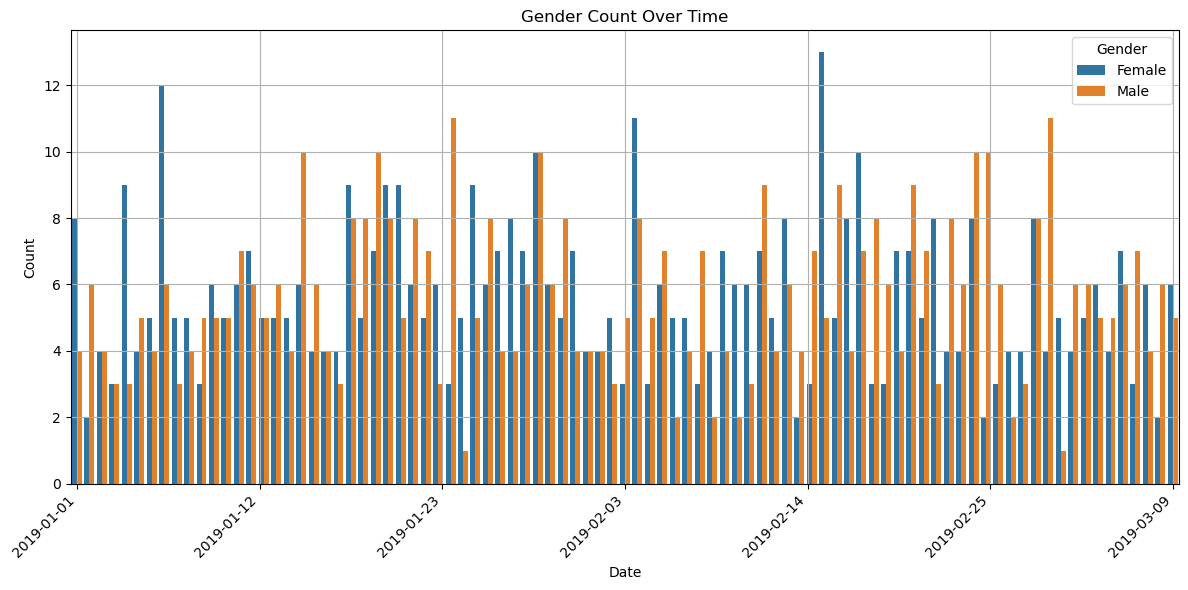

In [39]:

# Group by 'Date' and 'Gender', and count the occurrences
gender_date_counts = data.groupby(['Date', 'Gender']).size().unstack(fill_value=0)

# Melt the DataFrame for easier plotting with seaborn
gender_date_counts_melted = gender_date_counts.reset_index().melt(id_vars='Date', var_name='Gender', value_name='Count')

# Convert 'Date' to datetime if it's not already
gender_date_counts_melted['Date'] = pd.to_datetime(gender_date_counts_melted['Date'])

# Sort the DataFrame by date
gender_date_counts_melted = gender_date_counts_melted.sort_values('Date')

# Plot the data
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Date', y='Count', hue='Gender', data=gender_date_counts_melted)

# Customize x-axis ticks
all_dates = gender_date_counts_melted['Date'].unique()
start_date = all_dates[0]
end_date = datetime(2019, 3, 9)  # Use the last date you specified
date_range = pd.date_range(start=start_date, end=end_date, periods=7)

ax.set_xticks(np.linspace(0, len(all_dates) - 1, 7))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in date_range], rotation=45, ha='right')

plt.title('Gender Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation Heatmap
- Visualize the correlation between numerical features, excluding the 'gross margin percentage' column.


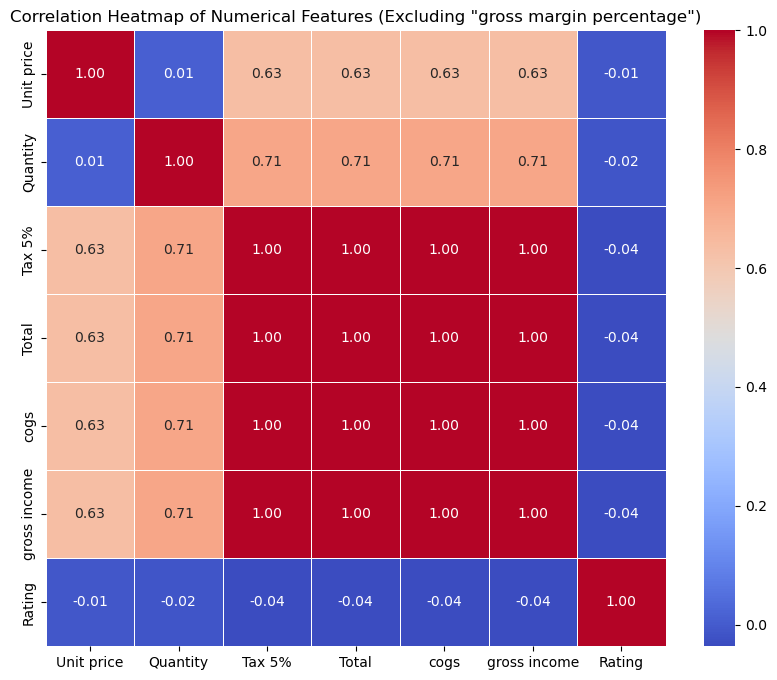

In [40]:

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Drop the 'gross margin percentage' column
numerical_data = numerical_data.drop(columns=['gross margin percentage'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Heatmap of Numerical Features (Excluding "gross margin percentage")')
plt.show()


In [41]:
data.Date

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [42]:
# Define the holidays
holidays=data[(data['Date'] == '1/4/2019') | (data['Date'] == '1/11/2019') | (data['Date'] == '3/2/2019')]

In [43]:
len(holidays)  #no of invoices in holidays

32

In [44]:
holidays.groupby('Date')['gross income'].sum()

Date
1/11/2019    100.7125
1/4/2019      77.3185
3/2/2019     312.3955
Name: gross income, dtype: float64

In [45]:
# Group by 'Product line' and sum the 'Total' revenue for each product line
revenue_by_product_line = data.groupby('Product line')['gross income'].sum()

# Find the product line with the highest revenue
top_product_line = revenue_by_product_line.idxmax()
top_revenue = revenue_by_product_line.max()

# # Display the result
print(f"The product line that generates the most revenue is '{top_product_line}' with a total revenue of {top_revenue}.")


The product line that generates the most revenue is 'Food and beverages' with a total revenue of 2673.564.


In [46]:
data.groupby('Product line')['Unit price'].mean()

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64